In [1]:
# import libraries and set plots to be embedded inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import regex as re
from scipy.stats import ttest_ind, chi2_contingency

import ipywidgets as widgets
from ipywidgets import interact
import plotly.graph_objs as go

%matplotlib inline

In [2]:
# load dataset

df = pd.read_csv("ds_salaries.csv")

In [3]:
# view dataset head

display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# view dataset info

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


None

The info output above shows the dataset does not have any missing data

#### We would be using the salary_in_usd column for the analysis of salaries. As a result, the salary and salary_currency columns can be dropped

In [5]:
# drop irrelevant columns

df.drop(['salary','salary_currency'], axis = 1, inplace = True)
display(df)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [6]:
# view count distribution of job title column

df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [7]:
# clean job titles with regex

df['job_title'] = df['job_title'].replace(r'.*(Scientist|Science).*', 'Data Scientist', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Analyst|Analytics).*', 'Data Analyst', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Data.* Engineer|ETL).*', 'Data Engineer', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(ML.* Engineer|Machine Learning).*', 'Machine Learning Engineer', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Data Architect).*', 'Data Architect', regex=True)

In [8]:
# view updated count distribution of job title column

df['job_title'].value_counts()

Data Scientist                       1181
Data Engineer                        1101
Data Analyst                          821
Machine Learning Engineer             375
Data Architect                        105
Research Engineer                      37
Data Manager                           29
Computer Vision Engineer               18
Data Specialist                        14
BI Developer                           13
AI Developer                           11
Head of Data                           10
NLP Engineer                            7
Deep Learning Engineer                  6
Computer Vision Software Engineer       5
3D Computer Vision Researcher           4
Business Intelligence Engineer          4
Data Strategist                         2
Data Modeler                            2
Autonomous Vehicle Technician           2
AI Programmer                           2
Data Lead                               2
Data Management Specialist              1
Deep Learning Researcher          

In [9]:
# since autonomous vehicle techincian is not a data science related job title, those rows would be dropped

df.drop(df[df['job_title'] == 'Autonomous Vehicle Technician'].index, inplace = True)

In [10]:
# create list of major job titles

major_jobs = df['job_title'].value_counts()[:5].index

In [11]:
# replace job titles not among the main job titles with 'Others'

df['job_title'] = df['job_title'].apply(lambda x: x if x in major_jobs else 'Others')

In [12]:
# view updated count distribution of job title column

df['job_title'].value_counts()

Data Scientist               1181
Data Engineer                1101
Data Analyst                  821
Machine Learning Engineer     375
Others                        170
Data Architect                105
Name: job_title, dtype: int64

In [13]:
#creates a new column with the converted currency using the most recent exchange rate(2/5/2025)
df['salary_in_cad'] = df['salary_in_usd'] * 1.43

In [14]:
#drops the USD column as it is no longer necessary
df.drop(['salary_in_usd'], axis = 1, inplace = True) 

In [15]:
#display updated data frame
display(df)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_cad
0,2023,SE,FT,Data Scientist,ES,100,ES,L,122761.21
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S,42900.00
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S,36465.00
3,2023,SE,FT,Data Scientist,CA,100,CA,M,250250.00
4,2023,SE,FT,Data Scientist,CA,100,CA,M,171600.00
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,US,100,US,L,589160.00
3751,2021,MI,FT,Data Scientist,US,100,US,L,215930.00
3752,2020,EN,FT,Data Scientist,US,100,US,S,150150.00
3753,2020,EN,CT,Data Analyst,US,100,US,L,143000.00


In [16]:
#creating a new column that interprets the remote ratio as In-Person, Hybrid or Fully Remote
df['remote_status'] = df['remote_ratio'].replace({0:'In-Person', 50:'Hybrid', 100:'Fully Remote'})

In [17]:
# drop remote ratio column
df.drop('remote_ratio', axis = 1, inplace = True)

In [18]:
# rename abbreviations of experience_level, employment_type and company_size with their full meanings

df['experience_level'] = df['experience_level'].replace({'EN':'Entry', 'MI':'Mid', 
                                                         'SE':'Senior', 'EX':'Executive'})

df['employment_type'] = df['employment_type'].replace({'PT':'Part Time', 'FT':'Full Time', 
                                                  'CT':'Contract', 'FL':'Freelance'})

df['company_size'] = df['company_size'].replace({'S':'Small', 'M':'Medium', 'L':'Large'})

In [19]:
#displaying the updated data frame
display(df)

,work_year,experience_level,employment_type,job_title,employee_residence,company_location,company_size,salary_in_cad,remote_status
0,2023,Senior,Full Time,Data Scientist,ES,ES,Large,122761.21,Fully Remote
1,2023,Mid,Contract,Machine Learning Engineer,US,US,Small,42900.00,Fully Remote
2,2023,Mid,Contract,Machine Learning Engineer,US,US,Small,36465.00,Fully Remote
3,2023,Senior,Full Time,Data Scientist,CA,CA,Medium,250250.00,Fully Remote
4,2023,Senior,Full Time,Data Scientist,CA,CA,Medium,171600.00,Fully Remote
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full Time,Data Scientist,US,US,Large,589160.00,Fully Remote
3751,2021,Mid,Full Time,Data Scientist,US,US,Large,215930.00,Fully Remote
3752,2020,Entry,Full Time,Data Scientist,US,US,Small,150150.00,Fully Remote
3753,2020,Entry,Contract,Data Analyst,US,US,Large,143000.00,Fully Remote


In [20]:
df = df[(df['company_location'] == 'US') | (df['company_location'] == 'CA')] 

In [21]:
# Generate summary statistics for numerical features

df.describe()

,work_year,salary_in_cad
count,3127.000000,3127.000000
mean,2022.456988,216313.565603
std,0.618536,80442.330414
min,2020.000000,8120.970000
25%,2022.000000,161447.000000
50%,2023.000000,207350.000000
75%,2023.000000,264550.000000
max,2023.000000,643500.000000


The describe function only applies to the salaries_in_cad column. The following observations can be gotten from the summary:

- Average salary in cad is 216,313.57 while the standard deviation is 80,442.33. The high standard deviation shows that the salaries have a high variation. 

- The minimum salary is 8,120.97, which could indicate a part time/contract/freelance job, while the maximum salary is 643,500.00, which could indicate the salary paid by a large company to employees with the highest experience level.

- 25% of the data earn less than 161,447.00, while 25% earn more than 264,550.00. The median salary is 207,350.00.

- The mean being greater than the median indicates that the salary distribution is right skewed. This is reasonable, as fewer employees are expected to earn the highest salaries.

## Detect Outliers

In [22]:
# Calculate Q1 and Q3
Q1 = df['salary_in_cad'].quantile(0.25)
Q3 = df['salary_in_cad'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df[(df['salary_in_cad'] < lower_bound) | (df['salary_in_cad'] > upper_bound)]
print(f"Number of outliers in Fare: {outliers.shape[0]}")

Q1: 161447.0
Q3: 264550.0
IQR: 103103.0
Lower Bound: 6792.5
Upper Bound: 419204.5
Number of outliers in Fare: 60


In [23]:
# display the minimum and maximum outliers

print("Minimum outlier: {}".format(outliers['salary_in_cad'].min()))
print("Maximum outlier: {}".format(outliers['salary_in_cad'].max()))

Minimum outlier: 425139.0
Maximum outlier: 643500.0


Based on the minimum and maximum outliers above, these values are expected salaries that large companies could pay employees at the highest experience levels. As a result, we would not be removing these values from the dataset, as they could also provide meaningful and important insights

In [24]:
bar = go.Histogram()
fig_bar = go.FigureWidget(data=bar)

@interact(year=[2020, 2021, 2022, 2023])
def update_bar(year=2023):
    data = df[df['work_year'] == year]['salary_in_cad']
    fig_bar.update_traces(
                          x=data, nbinsx = 100)
    fig_bar.update_layout(title_text="Salary Distribution {0}".format(year))

fig_bar

interactive(children=(Dropdown(description='year', index=3, options=(2020, 2021, 2022, 2023), value=2023), Out…

FigureWidget({
    'data': [{'nbinsx': 100,
              'type': 'histogram',
              'uid': '133fce65-32b8-4e4f-92e1-be6c8931b4c8',
              'x': array([ 42900.,  36465., 250250., ..., 128700., 228800., 193050.])}],
    'layout': {'template': '...', 'title': {'text': 'Salary Distribution 2023'}}
})

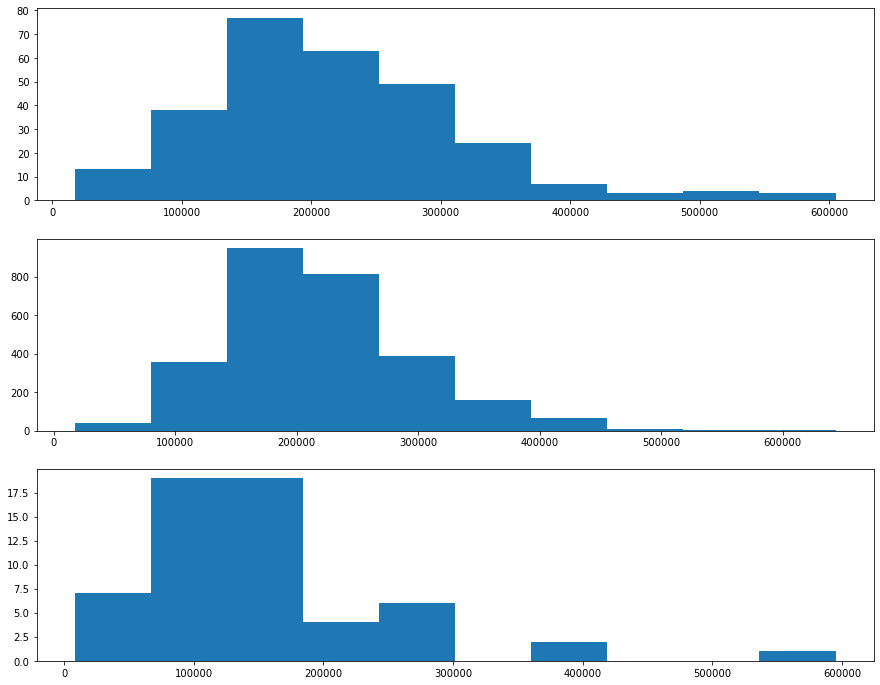

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

ax[0].hist(df[df['company_size'] == 'Large']['salary_in_cad']);
ax[1].hist(df[df['company_size'] == 'Medium']['salary_in_cad']);
ax[2].hist(df[df['company_size'] == 'Small']['salary_in_cad']);

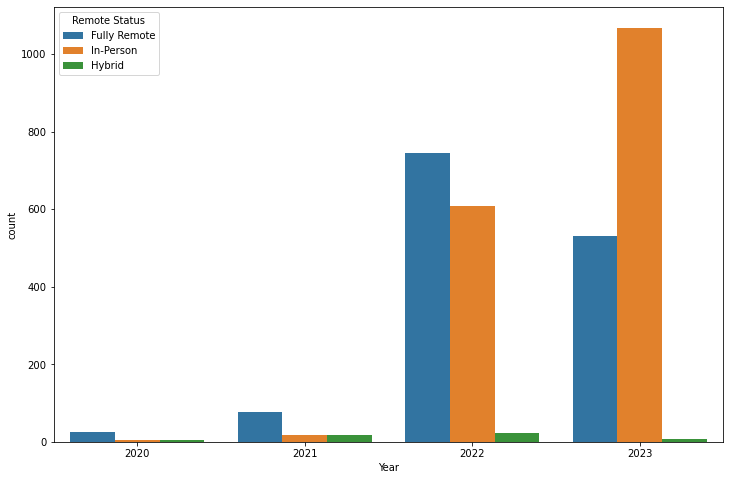

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'work_year', hue = 'remote_status')
plt.xlabel('Year')
plt.legend(title = 'Remote Status')
plt.show()

#### What are the proportions of employment types in the Data Science field?

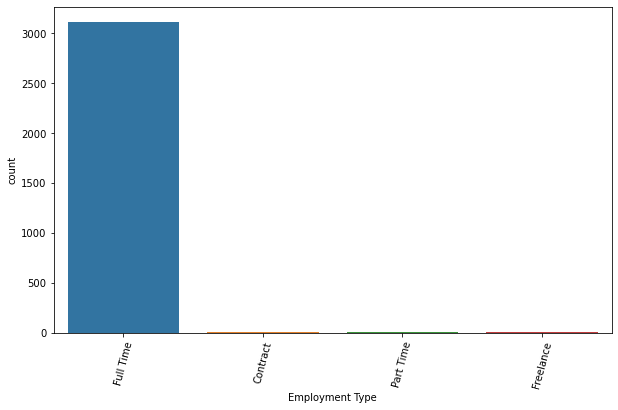

In [27]:
freq = df['employment_type'].value_counts()

# Get the indexes of the series
title_order = freq.index

plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'employment_type', order = title_order)
plt.xlabel('Employment Type')
plt.show()

In [28]:
experience_count = df['experience_level'].value_counts()
experience_count

Senior       2323
Mid           512
Entry         190
Executive     102
Name: experience_level, dtype: int64

In [29]:
experience_count.values

array([2323,  512,  190,  102])

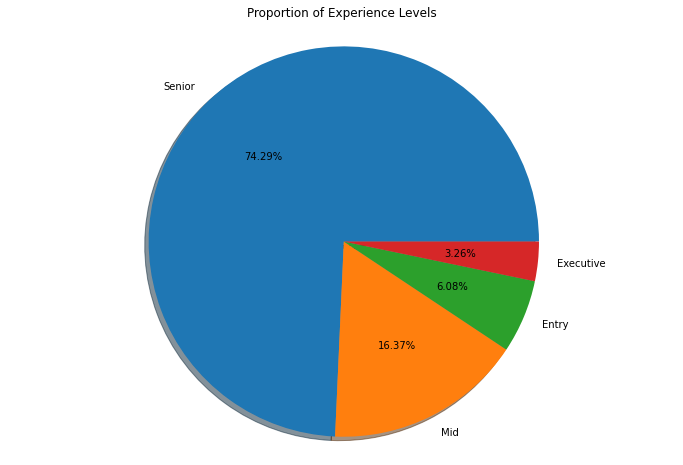

In [30]:
plt.figure(figsize=(12, 8))
plt.pie(experience_count.values, labels = experience_count.index, autopct='%1.2f%%', shadow=True)
plt.title("Proportion of Experience Levels")
plt.axis('equal')
plt.show()

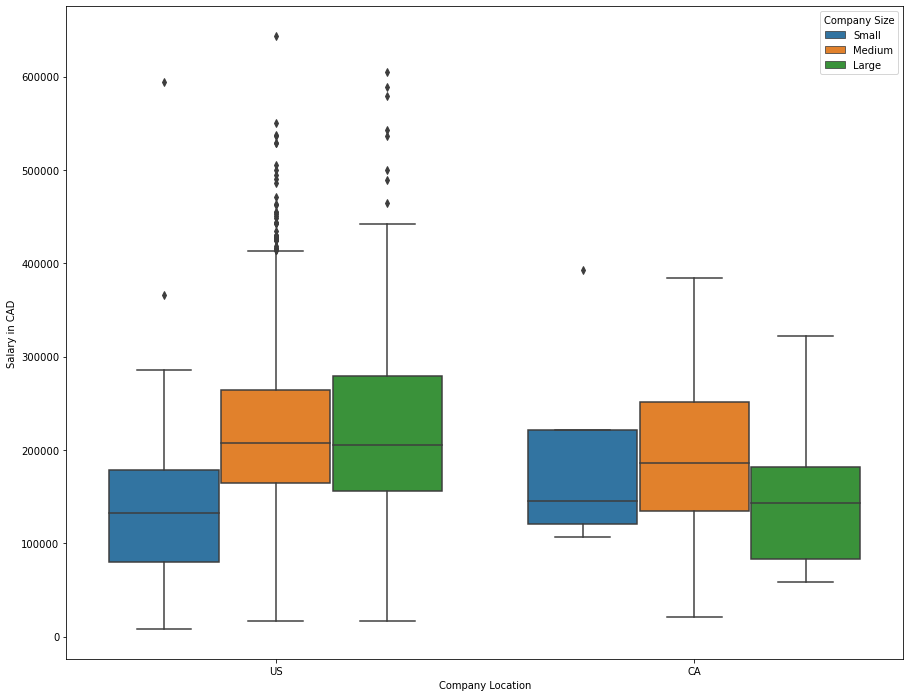

In [31]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x='company_location', y='salary_in_cad', hue = 'company_size')
plt.xlabel('Company Location')
plt.ylabel('Salary in CAD')
plt.legend(title = 'Company Size')
plt.show()

In [32]:
#finding the top 5 data science industry positions
job_total = df['job_title'].value_counts()

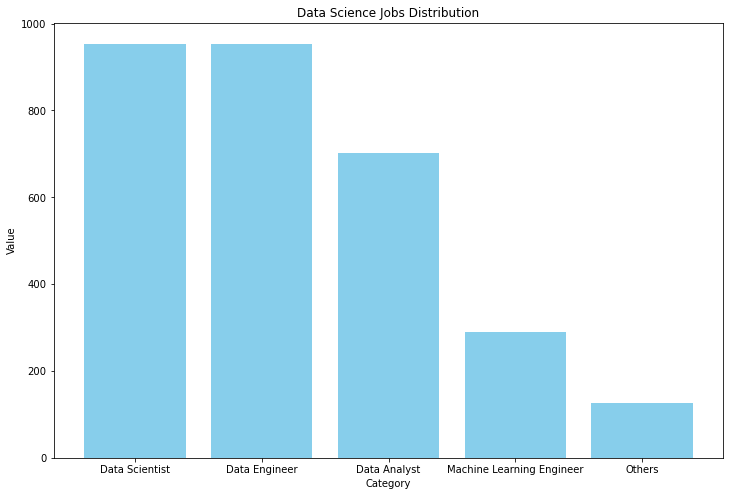

In [40]:
#creating a bar chart that shows the distribution of job titles 

plt.figure(figsize=(12, 8))
plt.bar(job_total.index, job_total.values, color='skyblue')
plt.title("Data Science Jobs Distribution")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()


This visualization shows the different job titles shown on our dataset along the x-axis, with their corresponding frequency displayed along the y-axis. This allows us to easily view the distribution of the various job titles in our dataset.

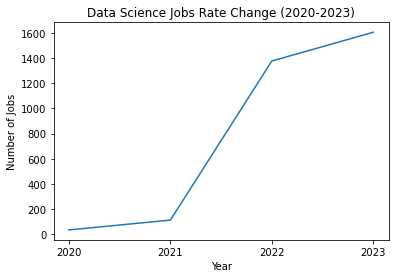

In [34]:
#creating a line plot to show the growth of the data science field over the past four years

growth_rate = df['work_year'].value_counts()
plt.figure(figsize=(6,4))
plt.plot(growth_rate.index,growth_rate.values)
plt.xticks(growth_rate.index)
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Data Science Jobs Rate Change (2020-2023)')
plt.show()

This plot shows the data science trends from 2020-2023. The plot shows the years along the x-axis and the job value counts along the y-axis. There is a significant jump in data science roles from 2021-2022 signifying a boom in the industry during those years. 

## Hypothesis Testing

Hypothesis testing would be performed on some variables of the dataset. T test would be performed on the continuous variable (salaries) while chi squared test would be performed on some categorical variables

### T-Test

Define Null and Alternate Hypotheses

- Null Hypothesis: There is no significant difference between the salaries of two selected job titles
- Alternate Hypothesis: There is a significant difference between the salaries of two selected job titles

In [35]:
# define function to compute the t-test of salaries between job titles using a significance level of 0.05

def ttest(df, type1, type2, salary_in_cad):
    df1 = df[df['job_title'] == type1]
    df2 = df[df['job_title'] == type2]

    #determine the pvalue of the t-test

    test = ttest_ind(df1[salary_in_cad], df2[salary_in_cad])

    print('The pvalue of the t-test is: {}'.format(test.pvalue))

    if test.pvalue < 0.05:
        return('There is a significant difference between the salaries of {}s and {}s'.format(type1, type2))
    else:
        return('There is no significant difference between the salaries of {}s and {}s'.format(type1, type2))

In [36]:
# run the function on Data Scientist and Data Analyst salaries

ttest(df, 'Data Scientist', 'Data Analyst', 'salary_in_cad')

The pvalue of the t-test is: 7.5721355275083655e-56


'There is a significant difference between the salaries of Data Scientists and Data Analysts'

### Chi-Squared Test

Define Null and Alternate Hypotheses

- Null Hypothesis: The two variables are independent and there is no relationship
- Alternate Hypothesis: The two variables are dependent and there is a relationship

In [37]:
# define function to compute the chi-squared test of two actegorical variables using a significance level of 0.05

def chi(df, column1, column2):
    
    # create frequency table of variables to be used for chi-squared test
    df_chi = pd.crosstab(df[column1], df[column2])
    
    # run chi-squared test
    test = chi2_contingency(df_chi)
    
    # determine the pvalue of the test
    print('The pvalue of the t-test is: {}'.format(test[1]))

    if test[1] < 0.05:
        return('{} and {} are dependent variables and there is a relationship between them'.format(column1, column2))
    else:
        return('{} and {} are independent variables and there is no relationship between them'.format(column1, column2))

In [38]:
# run the function on job_title and remote_status columns

chi(df, 'job_title', 'remote_status')

The pvalue of the t-test is: 7.639310513261271e-11


'job_title and remote_status are dependent variables and there is a relationship between them'

In [39]:
# run the function on experience_level company_size columns

chi(df, 'experience_level', 'company_size')

The pvalue of the t-test is: 1.3310479656308387e-34


'experience_level and company_size are dependent variables and there is a relationship between them'